# STOCK PROPHETIZER

 ## Analyse the AMAZON and SPY stocks compare them visually. 
 ## Find the Forecast model using FACEBOOK PROPHETIZER
 ## Fetch the data using ALPACA API ( SPY & AMZN )
 ## Data Cleaning Process ( Multiple dataframes and Summary )
 ## Use Facebook Prophet to predict future prices

In [151]:
# Initial imports
import os
import requests
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from prophet import Prophet
import datetime as dt
import matplotlib.pyplot as plt

%matplotlib inline


In [152]:
# Load .env environment variables
load_dotenv()

True

In [153]:
# plt.style.available
plt.style.use("seaborn-whitegrid")

In [154]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [155]:
type(alpaca_api_key)
type(alpaca_secret_key)

str

In [156]:
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [157]:
## 

In [158]:
# Format current date as ISO format
start_date = pd.Timestamp("2016-11-17", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-11-17", tz="America/New_York").isoformat()

In [159]:
# Set timeframe to one day ('1D') for the Alpaca API
timeframe = "1D"
ticker_stock_1 = ["AMZN"]
ticker_stock_2 = ["SPY"]


In [160]:
# Get current price data for investigating stock 1: AMZN
df_price_stock_1 = alpaca.get_barset(
    ticker_stock_1,
    timeframe,
    start = start_date,
    end = end_date,
    limit=1000
).df

# Display sample data
df_price_stock_1

AMZN                                        
                               open       high        low    close   volume
time                                                                       
2017-11-29 00:00:00-05:00  1194.800  1194.8000  1145.1900  1161.21  6484713
2017-11-30 00:00:00-05:00  1167.100  1178.5700  1160.0000  1176.59  2669924
2017-12-01 00:00:00-05:00  1172.050  1179.6500  1152.0000  1161.83  2674294
2017-12-04 00:00:00-05:00  1173.850  1175.2000  1128.0000  1133.95  4091385
2017-12-05 00:00:00-05:00  1128.250  1159.2700  1124.7400  1141.58  2793610
...                             ...        ...        ...      ...      ...
2021-11-11 00:00:00-05:00  3514.740  3543.2400  3467.4700  3472.46  2087255
2021-11-12 00:00:00-05:00  3488.890  3540.7263  3447.0500  3525.97  2316171
2021-11-15 00:00:00-05:00  3538.045  3593.8800  3525.8100  3545.69  2370404
2021-11-16 00:00:00-05:00  3539.000  3576.5000  3525.1465  3540.70  1878273
2021-11-17 00:00:00-05:00  3565.950  3587.2450  3545.3500  3548.86  2332560

[1000 rows x 5 columns]

## TIME SERIES PLOTTING

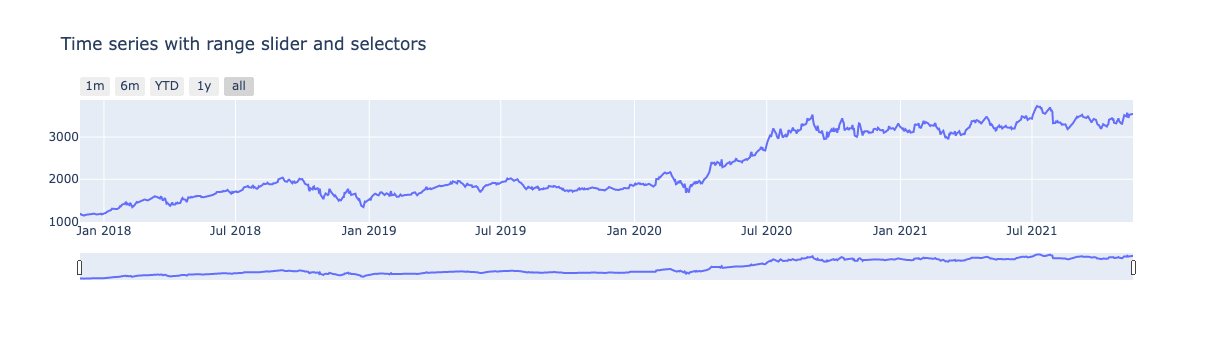

In [162]:
import plotly.graph_objects as go
# Create figure
fig = go.Figure()

fig.add_trace(
    go.Scatter(x=list(df_price_stock_1.index), y=list(df_price_stock_1["AMZN"]["close"])))

# Set title
fig.update_layout(
    title_text="Time series with range slider and selectors"
)

# Add range slider
fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label="1m",
                     step="month",
                     stepmode="backward"),
                dict(count=6,
                     label="6m",
                     step="month",
                     stepmode="backward"),
                dict(count=1,
                     label="YTD",
                     step="year",
                     stepmode="todate"),
                dict(count=1,
                     label="1y",
                     step="year",
                     stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)

fig.show(height=1000)

In [163]:
# Create and empty DataFrame for closing prices
df_closing_stock_1 = pd.DataFrame()

# Fetch the closing prices for all the tickers
for ticker in ticker_stock_1:
    df_closing_stock_1[ticker] = df_price_stock_1[ticker]["close"]

# Drop the time component of the date
df_closing_stock_1.index = df_closing_stock_1.index.date

# Display sample data
df_closing_stock_1.head()

,AMZN
2017-11-29,1161.21
2017-11-30,1176.59
2017-12-01,1161.83
2017-12-04,1133.95
2017-12-05,1141.58


In [164]:
# Count nulls
df_price_stock_1.isnull().sum()

AMZN  open      0
      high      0
      low       0
      close     0
      volume    0
dtype: int64

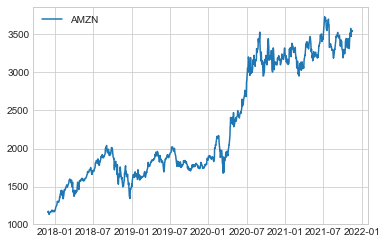

In [165]:
# Plot the Closing Prices of Amazon for past 6 months
df_closing_stock_1.plot()

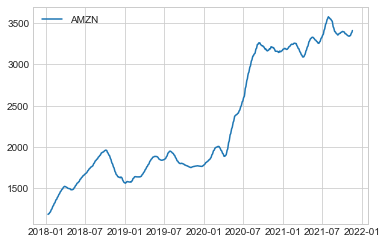

In [166]:
# Rolling Statistics 30-Day Mean of Amazon Closing Prices
df_closing_stock_1.rolling(window=30).mean().plot()

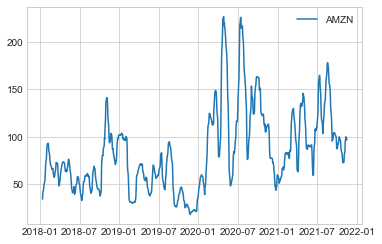

In [167]:
# Rolling Statistics 30-Day Standard Deviation of stock 1 Closing Prices
df_closing_stock_1.rolling(window=30).std().plot()

In [168]:
# Calculate the summary statistics of key points of stock
df_stock_1_summary = df_price_stock_1.describe()
df_stock_1_summary

AMZN                                                     
              open         high          low        close        volume
count  1000.000000  1000.000000  1000.000000  1000.000000  1.000000e+03
mean   2306.377227  2331.006351  2279.177805  2305.627048  3.934869e+06
std     754.148497   762.046302   745.885619   753.304394  2.473483e+06
min    1128.250000  1155.890000  1124.740000  1133.950000  8.007380e+05
25%    1725.007500  1745.067675  1704.390000  1725.595000  2.520812e+06
50%    1913.065000  1929.170000  1892.811150  1907.360000  3.276006e+06
75%    3173.972500  3202.132500  3130.657500  3163.787500  4.673992e+06
max    3743.500000  3773.078100  3696.793000  3731.420000  3.302451e+07

In [169]:
# Compute daily returns for stock 1
df_daily_returns_stock_1 = df_closing_stock_1.pct_change().dropna()

# Display sample data
df_daily_returns_stock_1.head()

,AMZN
2017-11-30,0.013245
2017-12-01,-0.012545
2017-12-04,-0.023997
2017-12-05,0.006729
2017-12-06,0.009951


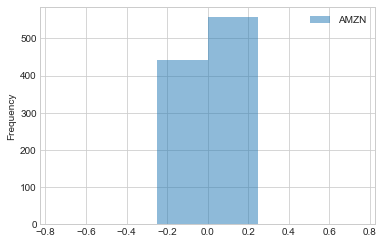

In [170]:
# Visualize the distribution of daily returns across all stocks using a histogram plot
# Hint: To make the plot easier to read, set the alpha arguement to 0.5
df_daily_returns_stock_1.plot.hist(alpha=0.5,bins=[-0.75,-0.5,-0.25,0,0.25,0.5,0.75])

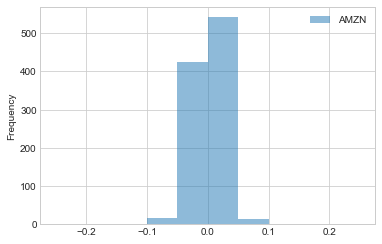

In [171]:
df_daily_returns_stock_1.plot.hist(alpha=0.5,bins=[-0.25,-0.20,-0.15,-0.10,-0.05,0,0.05,0.10,0.15,0.20,0.25])

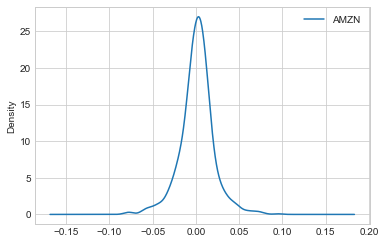

In [172]:
# Visualize the distribution of daily returns across stock using a density plot
df_daily_returns_stock_1.plot.density()

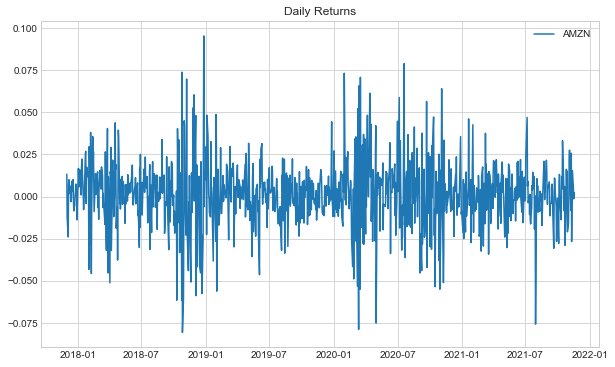

In [173]:
df_daily_returns_stock_1.plot(title = "Daily Returns", figsize = (10,6))


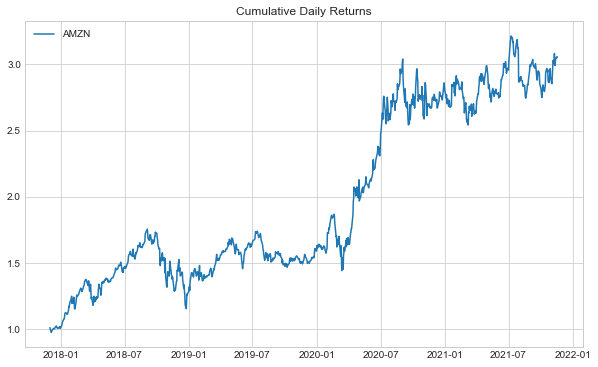

In [174]:
# Calculate cumulative returns
cumulative_return = (1 + df_daily_returns_stock_1).cumprod()

# Plot cumulative returns
cumulative_return.plot(title='Cumulative Daily Returns', figsize = (10,6))

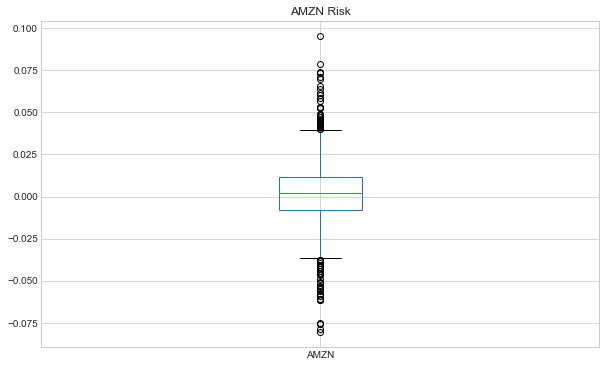

In [175]:
# Box plot to visually show risk
df_daily_returns_stock_1.plot(kind = "box", title = 'AMZN Risk', figsize = (10,6))

In [176]:
# Calculate the daily standard deviations of all portfolios
df_daily_std = df_daily_returns_stock_1.std().sort_values(ascending=True)
df_daily_std

AMZN    0.019677
dtype: float64

In [177]:
# Calculate the daily return summary statistics
df_daily_std = df_daily_returns_stock_1.describe()
df_daily_std


,AMZN
count,999.000000
mean,0.001312
std,0.019677
min,-0.080651
25%,-0.007889
50%,0.001807
75%,0.011312
max,0.095241


In [178]:
# Calculate the annualized standard deviation (252 trading days)
df_annualized_std = df_daily_std * np.sqrt(252)
df_annualized_std

,AMZN
count,15858.633359
mean,0.020833
std,0.312369
min,-1.280294
25%,-0.125241
50%,0.028688
75%,0.179579
max,1.511903


In [179]:
# Calculate the rolling Mean for the stock using a 21-day window
stock1_rolling_mean_21days = df_daily_returns_stock_1.rolling(window = 21).mean().dropna()
stock1_rolling_mean_21days

,AMZN
2017-12-29,0.000382
2018-01-02,0.000543
2018-01-03,0.001691
2018-01-04,0.003107
2018-01-05,0.003551
...,...
2021-11-11,0.002790
2021-11-12,0.003308
2021-11-15,0.001996
2021-11-16,0.001416


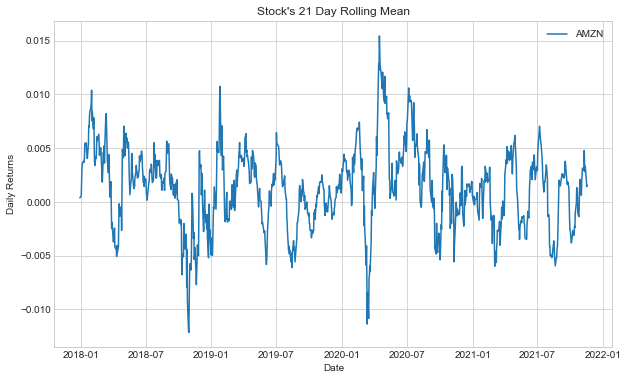

In [180]:
stock1_rolling_mean_21days.plot(title="Stock's 21 Day Rolling Mean", xlabel=("Date"), ylabel=("Daily Returns"),figsize = (10,6))

In [181]:
# Calculate the rolling standard deviation for the stock using a 21-day window
stock1_rolling_std_21days = df_daily_returns_stock_1.rolling(window = 21).std().dropna()
stock1_rolling_std_21days

,AMZN
2017-12-29,0.009288
2018-01-02,0.009549
2018-01-03,0.009343
2018-01-04,0.007281
2018-01-05,0.007781
...,...
2021-11-11,0.017380
2021-11-12,0.017596
2021-11-15,0.016235
2021-11-16,0.016122


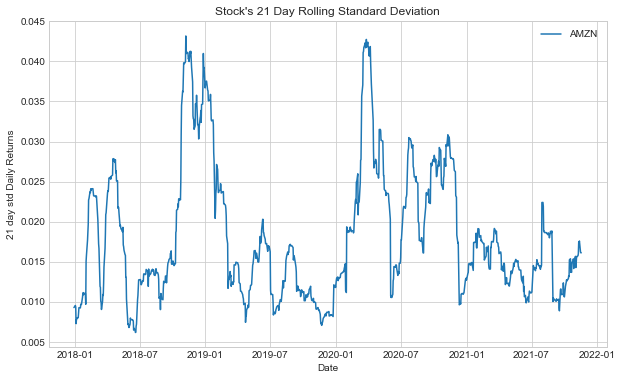

In [182]:
stock1_rolling_std_21days.plot(title="Stock's 21 Day Rolling Standard Deviation", xlabel=("Date"), ylabel=("21 day std Daily Returns"), figsize = (10,6))

In [184]:
# Get current price data for investigating stock 2: SPY
df_price_stock_2 = alpaca.get_barset(
    ticker_stock_2,
    timeframe,
    start = start_date,
    end = end_date
).df

# Display sample data
df_price_stock_2.head()

SPY                                    
                             open    high       low   close    volume
time                                                                 
2021-06-29 00:00:00-04:00  427.89  428.56  427.1300  427.68  32097572
2021-06-30 00:00:00-04:00  427.20  428.78  427.1800  428.08  46776402
2021-07-01 00:00:00-04:00  428.83  430.60  428.8000  430.47  44147835
2021-07-02 00:00:00-04:00  431.67  434.10  430.5218  433.75  46557070
2021-07-06 00:00:00-04:00  433.78  434.01  430.0100  432.90  60410491

In [185]:
# Create and empty DataFrame for closing prices
df_closing_stock_2 = pd.DataFrame()

# Fetch the closing prices for all the tickers
for ticker in ticker_stock_2:
    df_closing_stock_2[ticker] = df_price_stock_2[ticker]["close"]

# Drop the time component of the date
df_closing_stock_2.index = df_closing_stock_2.index.date

# Compute daily returns
df_daily_returns_stock_2 = df_closing_stock_2.pct_change().dropna()

# Display sample data
df_daily_returns_stock_2.head()

,SPY
2021-06-30,0.000935
2021-07-01,0.005583
2021-07-02,0.007620
2021-07-06,-0.001960
2021-07-07,0.003534


In [186]:
# Join stock 1 & 2  daily returns into a single DataFrame with columns for each stocks daily returns.
combined_daily = pd.concat([df_daily_returns_stock_1, df_daily_returns_stock_2], axis = "columns", join = "inner")
combined_daily_return = combined_daily.dropna()
combined_daily_return

,AMZN,SPY
2021-06-30,-0.002664,0.000935
2021-07-01,-0.002125,0.005583
2021-07-02,0.022724,0.007620
2021-07-06,0.046918,-0.001960
2021-07-07,0.006195,0.003534
...,...,...
2021-11-11,-0.002770,0.000388
2021-11-12,0.015410,0.007438
2021-11-15,0.005593,0.000278
2021-11-16,-0.001407,0.003958


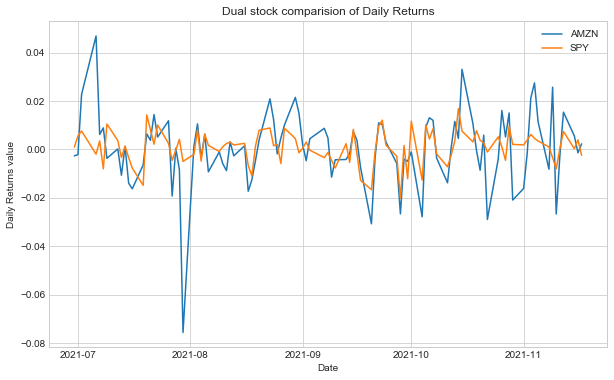

In [187]:
# Plot daily returns of all compared stock
combined_daily_return.plot(title = "Dual stock comparision of Daily Returns", xlabel=("Date"), ylabel=("Daily Returns value"), figsize = (10,6))

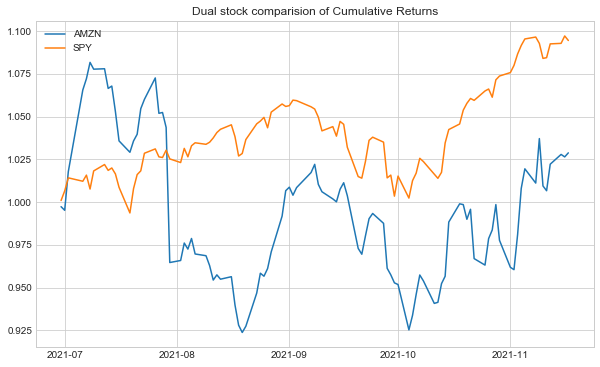

In [188]:
# Calculate cumulative returns of compared stocks
combined_cumulative_return = (1 + combined_daily_return).cumprod()

# Plot cumulative returns
combined_cumulative_return.plot(title='Dual stock comparision of Cumulative Returns', figsize = (10,6))

In [189]:
# Calculate the correlation between each stock to determine if stock mimick each other
correlation = combined_daily_return.corr()
correlation

,AMZN,SPY
AMZN,1.000000,0.483197
SPY,0.483197,1.000000


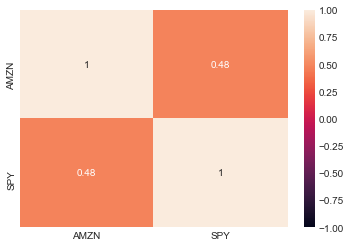

In [190]:
# Plot the correlation
sns.heatmap(correlation, vmin=-1, vmax=1,annot=True)
## NOTE: The closer 'r' is to 1, the stronger the positive association between two quantitive variables

In [191]:
# Calculate covariance of a stock 1
stock1_stock2_rolling_covariance = combined_daily_return['AMZN'].rolling(window=60).cov(combined_daily_return['SPY']).dropna()
stock1_stock2_rolling_covariance.head()

2021-09-23    0.000044
2021-09-24    0.000044
2021-09-27    0.000045
2021-09-28    0.000051
2021-09-29    0.000052
dtype: float64

In [192]:
# Calculate variance of stock 1
stock1_stock2_rolling_variance = combined_daily_return['AMZN'].rolling(window=60).var().dropna()
stock1_stock2_rolling_variance.head()

2021-09-23    0.000237
2021-09-24    0.000237
2021-09-27    0.000238
2021-09-28    0.000240
2021-09-29    0.000201
Name: AMZN, dtype: float64

In [193]:
# Computing beta
stock1_stock2_beta = stock1_stock2_rolling_covariance / stock1_stock2_rolling_variance
stock1_stock2_beta.head()

2021-09-23    0.185812
2021-09-24    0.186097
2021-09-27    0.187869
2021-09-28    0.211669
2021-09-29    0.260801
dtype: float64

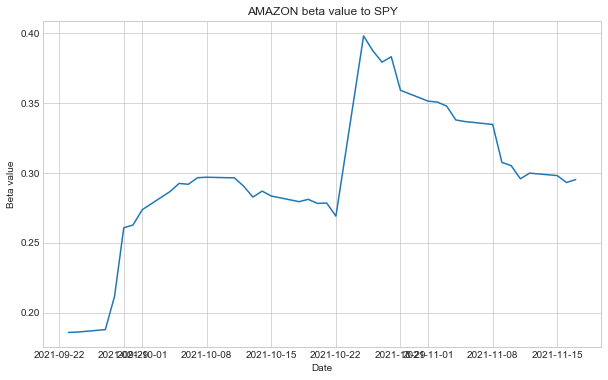

In [194]:
# Plot beta trend
stock1_stock2_beta_plot = stock1_stock2_beta.plot(title="AMAZON beta value to SPY", xlabel=("Date"), ylabel=("Beta value"), figsize=(10, 6))

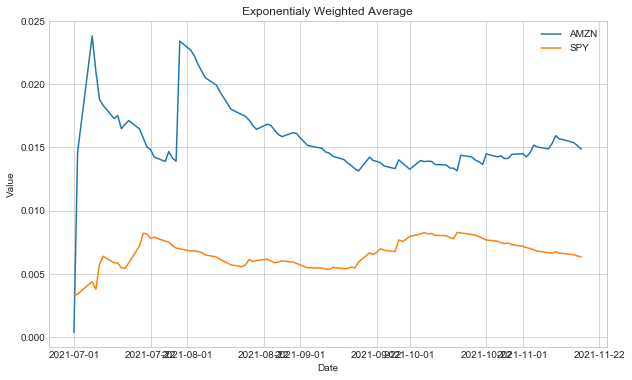

In [195]:
# Use `ewm` to calculate the rolling window
rolling_window_ewm = combined_daily_return.ewm(halflife=21, adjust=True).std().plot(title="Exponentialy Weighted Average", xlabel=("Date"), ylabel=("Value"), figsize=(10, 6))
rolling_window_ewm

In [196]:
# Annualized Sharpe Ratios
sharpe_ratio = (combined_daily_return.mean() * 252) / (combined_daily_return.std() * np.sqrt(252))
sharpe_ratio

AMZN    0.419984
SPY     2.212452
dtype: float64

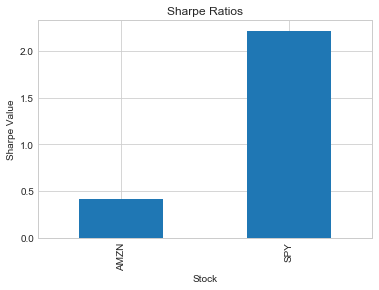

In [130]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot(kind="bar", xlabel=("Stock"), ylabel=("Sharpe Value"), title="Sharpe Ratios")

# AMAZON PROPHET FORECAST ANALYSIS - SPY

In [197]:
df_closing_stock_2.index.name = 'date'
amzn_price = df_closing_stock_2.reset_index()
#df_closing_prices.rename(columns={'AMZN': 'y', 'date': 'ds'}, inplace=True)
#df_closing_prices = df_closing_prices.rename(columns={"date": "ds", "y": "y"})
#df_closing_prices = df_closing_prices.rename(index={0: "ds"})

#df_closing_prices = df_closing_prices.reset_index()
amzn_price = amzn_price.rename(columns={"date": "ds", "SPY": "y"})

amzn_price.head()


,ds,y
0,2021-06-29,427.68
1,2021-06-30,428.08
2,2021-07-01,430.47
3,2021-07-02,433.75
4,2021-07-06,432.90


In [198]:
m = Prophet()

m.fit(amzn_price)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [200]:
# Create Future dates
future_prices = m.make_future_dataframe(periods=750)

# Predict Prices
forecast = m.predict(future_prices)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
845,2023-12-03,1057.675925,-271.001050,2268.654021
846,2023-12-04,1060.038205,-275.891188,2272.043754
847,2023-12-05,1060.727952,-275.137334,2276.097337
848,2023-12-06,1061.690214,-277.206552,2276.954068
849,2023-12-07,1063.401141,-275.222237,2285.073797


/Users/jkaryampudi/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1377: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.

/Users/jkaryampudi/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/matplotlib/axes/_base.py:239: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



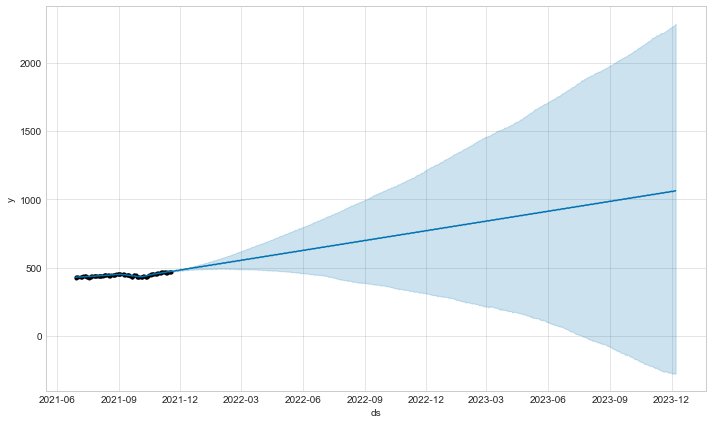

In [201]:
fig1 = m.plot(forecast)

/Users/jkaryampudi/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



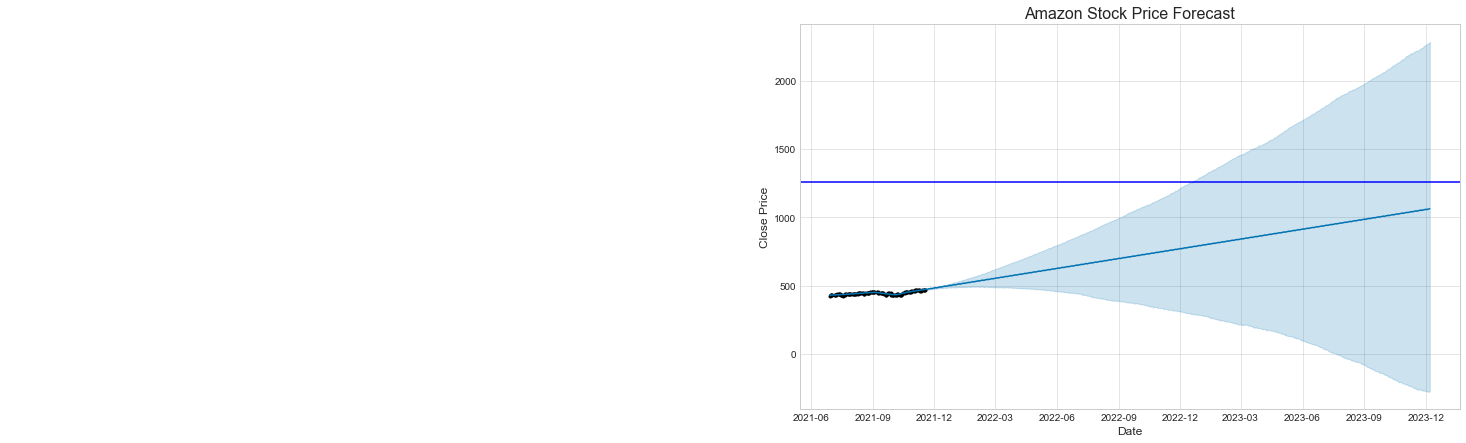

In [202]:
import matplotlib.dates as mdates

# Dates
starting_date = dt.datetime(2018, 4, 7)
starting_date1 = mdates.date2num(starting_date)
trend_date = dt.datetime(2018, 6, 7)
trend_date1 = mdates.date2num(trend_date)

pointing_arrow = dt.datetime(2018, 2, 18)
pointing_arrow1 = mdates.date2num(pointing_arrow)

# Learn more Prophet tomorrow and plot the forecast for amazon.
fig = m.plot(forecast)
ax1 = fig.add_subplot(111)
ax1.set_title("Amazon Stock Price Forecast", fontsize=16)
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Close Price", fontsize=12)

# Forecast initialization arrow
ax1.annotate('Forecast \n Initialization', xy=(pointing_arrow1, 1350), xytext=(starting_date1,1700),
            arrowprops=dict(facecolor='#ff7f50', shrink=0.1),
            )

# Trend emphasis arrow
ax1.annotate('Upward Trend', xy=(trend_date1, 1225), xytext=(trend_date1,950),
            arrowprops=dict(facecolor='#6cff6c', shrink=0.1),
            )

ax1.axhline(y=1260, color='b', linestyle='-')

plt.show()

/Users/jkaryampudi/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1377: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.

/Users/jkaryampudi/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/matplotlib/axes/_base.py:239: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



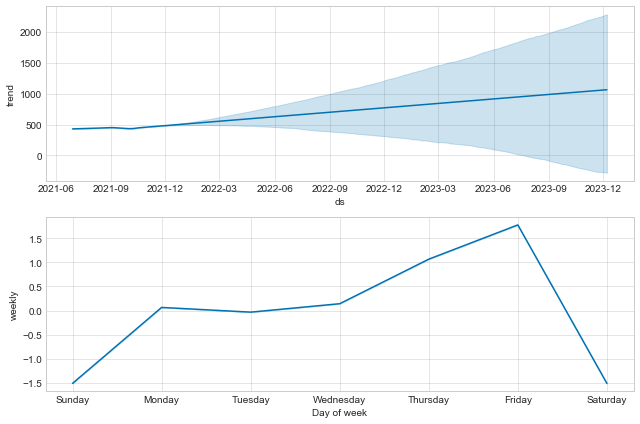

In [203]:
fig2 = m.plot_components(forecast)
plt.show()

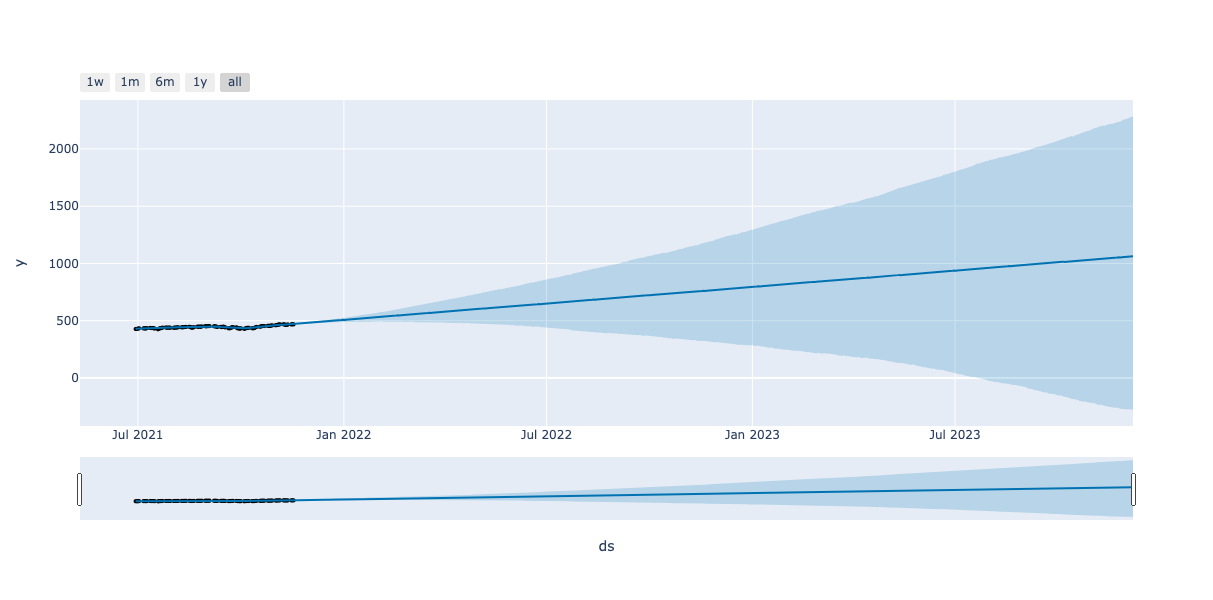

In [204]:
# An interactive figure of the forecast and components
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/jkaryampudi/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1377: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.

/Users/jkaryampudi/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/matplotlib/axes/_base.py:239: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



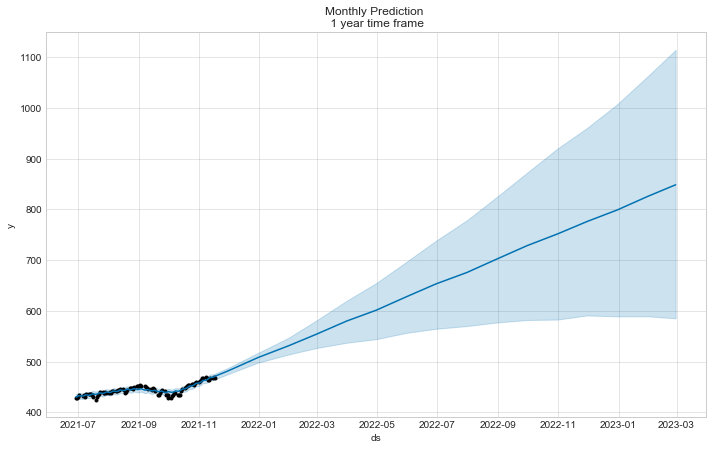

In [205]:
# Monthly Data Predictions
m = Prophet(changepoint_prior_scale=0.01).fit(amzn_price)
future = m.make_future_dataframe(periods=16, freq='M')
fcst = m.predict(future)
fig = m.plot(fcst)
plt.title("Monthly Prediction \n 1 year time frame")

plt.show()

/Users/jkaryampudi/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1377: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.

/Users/jkaryampudi/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/matplotlib/axes/_base.py:239: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



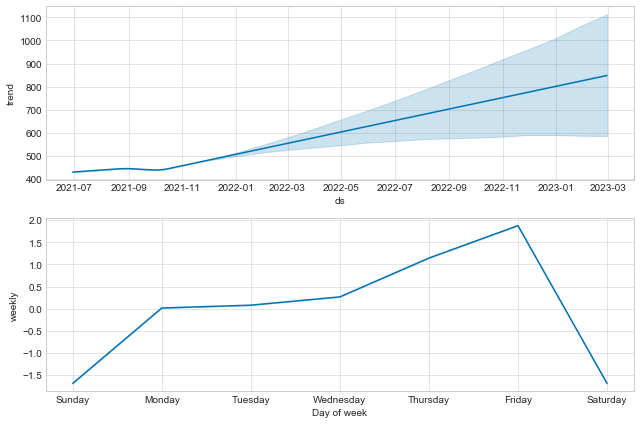

In [206]:
fig = m.plot_components(fcst)
plt.show()